## Исследование спроса во время фестивалей для авиакомпании

### Источник данных
Исторически данные о полетах авиакомпании:

- модель самолета,
- количество рейсов для каждой модели самолетов,
- город и среднее количество рейсов, прибывающих в него за день.


### Основные цели проекта 
Изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

**Аналитика средствами Python**

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.


# Аналитика

In [2]:
#Импорт необходимых библиотек.
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import random

**Загрузим данные и проанализируем их.**

In [ ]:
#Загружаем данные.
data_model = pd.read_csv('query_1.csv')
data_city = pd.read_csv('query_3.csv')

In [5]:
#Смотрим на таблицу data_model.
data_model

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [6]:
#Смотрим общую информацию.
print(data_model.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None


In [7]:
#Смотрим на таблицу data_city.
data_city

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [8]:
#Смотрим общую информацию.
print(data_city.info())

#Определяю количество пропущенных значений в столбцах data_city.
print(data_city.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None
city               0
average_flights    0
dtype: int64


**Вывод**

- Типы данных корректны для решаемой задачи.
- Пропусков в данных нет.

**Выберем топ-10 городов по количеству рейсов.**

In [9]:
#Выберем топ-10 городов по количеству рейсов.
data_city.sort_values(by = 'average_flights', ascending = False).head(10)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


**Вывод**

Выше получен список 10 городов с наибольшим средним количеством рейсов.
- Москва в 4 раза превышает следующий город Санкт-Петеребург по количеству рейсов.
- Санкт-Петербург имеет в 1.8 раза больше рейсов, чем Новосибирск.
- Новосибирск в 1,5 раза превышает Красноярск по количеству рейсов.
- Остальные города в топе отличаются друг от друга немного: в пределах 2 полетов.

**Построим график «Модели самолётов и количество рейсов»**

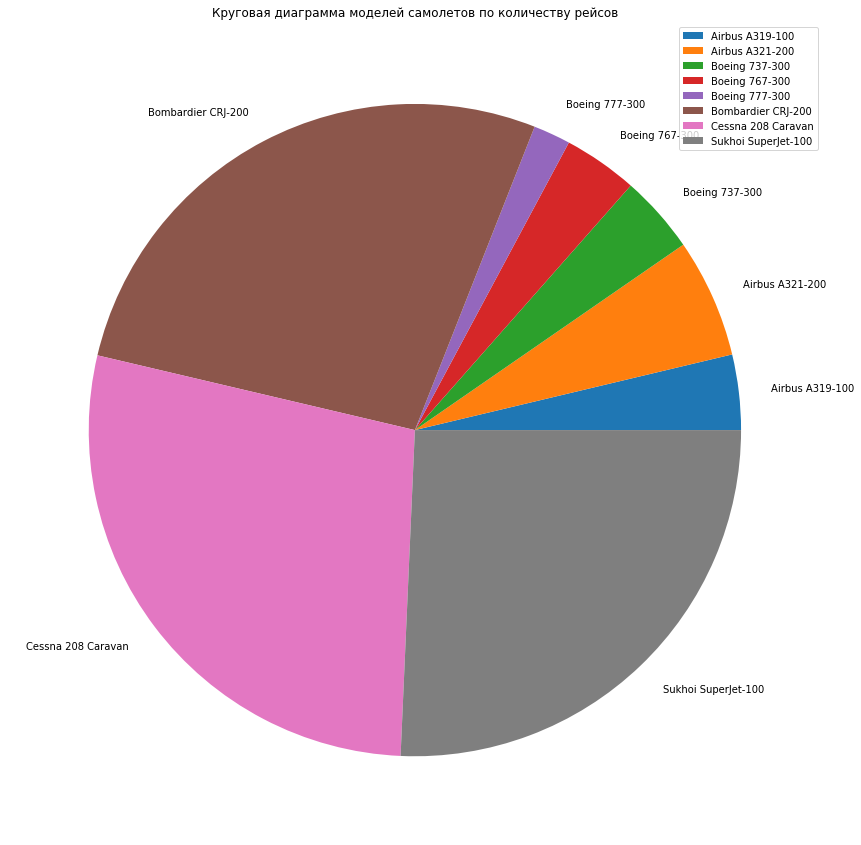

In [10]:
#Построим круговую диаграмму.
data_pie = pd.DataFrame({'flights': data_model['flights_amount'].values}, index=data_model['model'].values)

data_pie.plot(kind='pie', subplots=True, figsize=(15, 15))
plt.title("Круговая диаграмма моделей самолетов по количеству рейсов")
plt.ylabel("")
plt.show()

Text(0.5, 0, 'Модели самолетов')

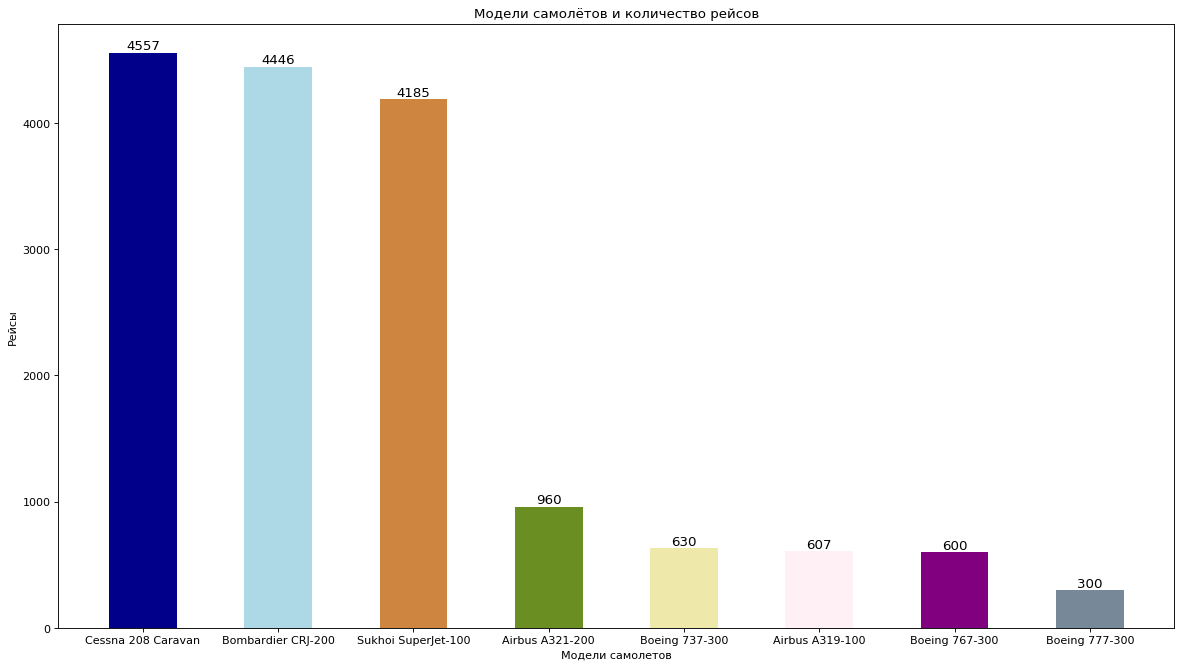

In [11]:
#Построим столбчатую диаграмму.
data_model = data_model.sort_values(by = 'flights_amount', ascending = False)
n = data_model['model'].__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

plt.figure(figsize=(18,10), dpi= 80)
plt.bar(data_model['model'].values.tolist(), data_model['flights_amount'].values, color=c, width=.5)
for i, val in enumerate(data_model['flights_amount'].values):
    plt.text(i, val, round(val, 2), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})
    
plt.title('Модели самолётов и количество рейсов', fontsize=12)
plt.ylabel('Рейсы')
plt.xlabel('Модели самолетов') 

**Вывод**

По графикам видно, что:
- наибольшее количество рейсов у модели Cessna 208 Caravan,
- наименьшее количество рейсов у модели Boeing 777-300.

Разница межжду №1 и №8: 15,2 раза.

Чем вместительнее самолет, тем реже он летает.

**Построим график «Города и количество рейсов»**

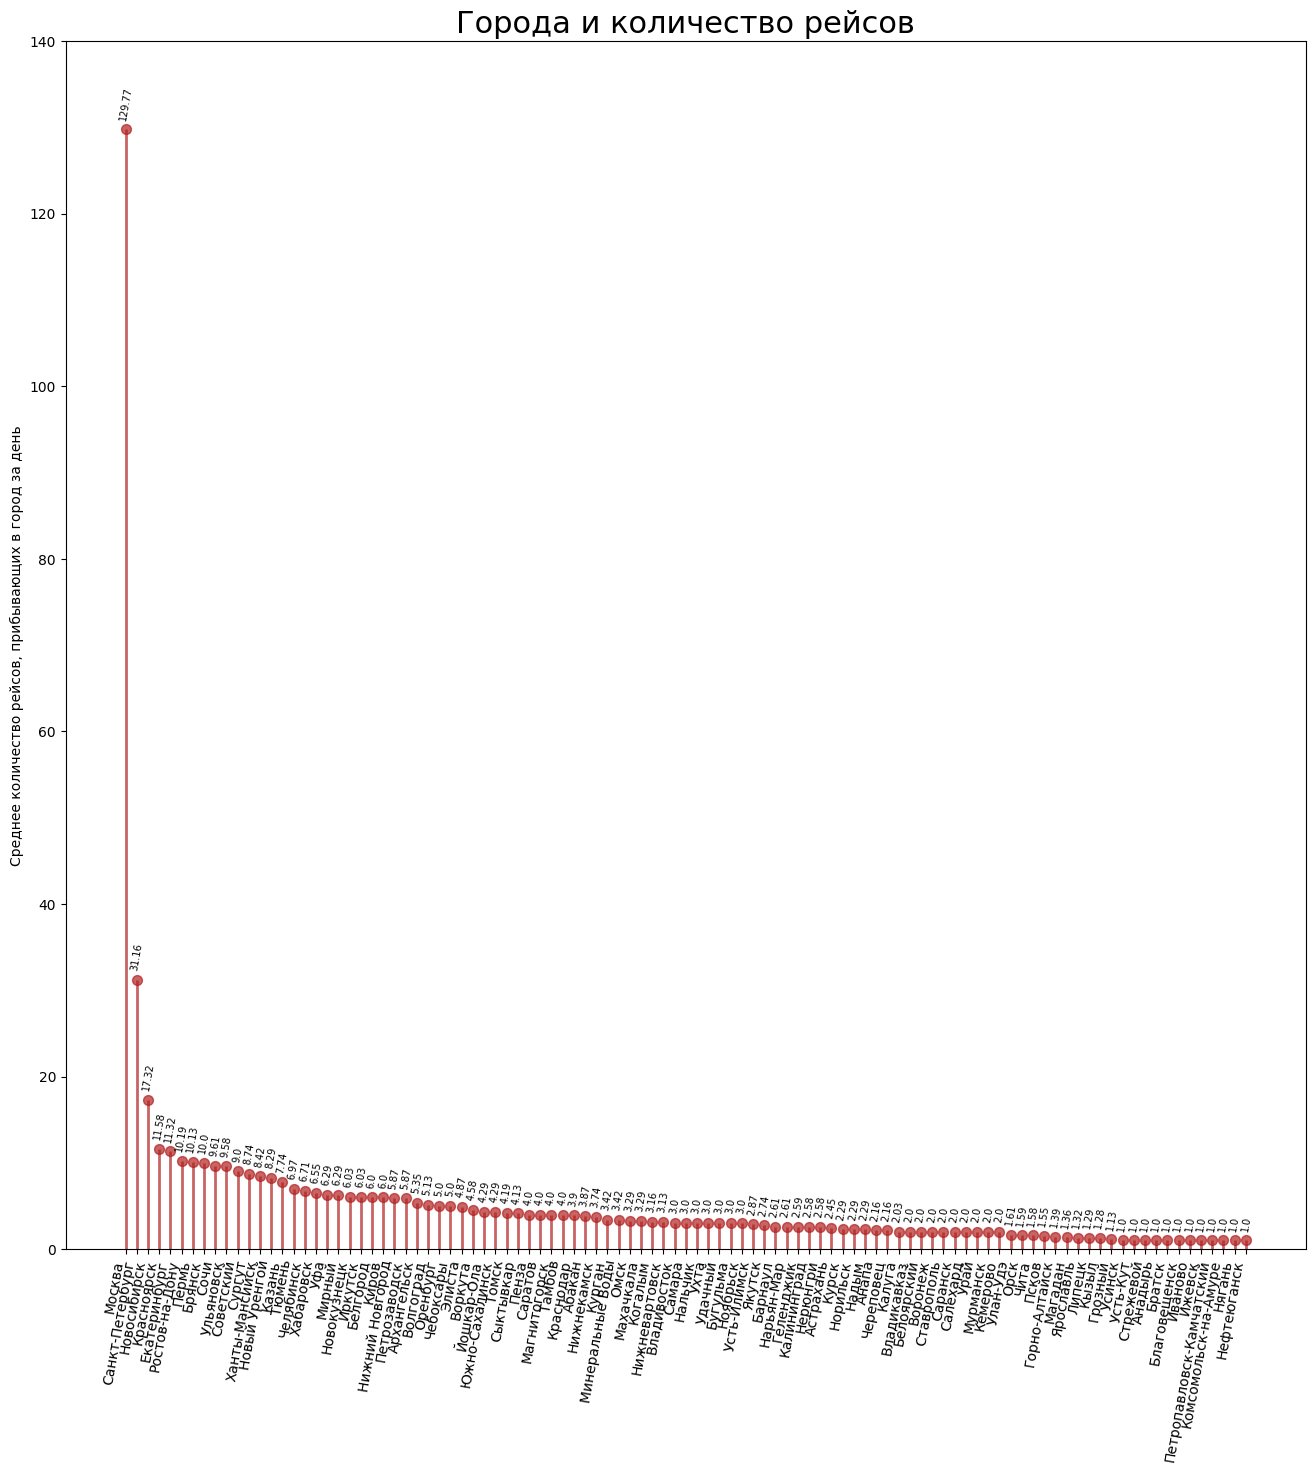

In [12]:
data_city.sort_values('average_flights', ascending = False, inplace=True)
#data_city = data_city.reset_index()


fig, ax = plt.subplots(figsize=(16,16), dpi= 100)
ax.vlines(x=data_city['city'].values, ymin=0, ymax=data_city['average_flights'], color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=data_city['city'].values, y=data_city['average_flights'], s=50, color='firebrick', alpha=0.7)


ax.set_title('Города и количество рейсов', fontdict={'size':22})
ax.set_ylabel('Среднее количество рейсов, прибывающих в город за день')
ax.set_xticks(data_city['city'].values)
ax.set_xticklabels(data_city['city'].values.tolist(), rotation=80, fontdict={'horizontalalignment': 'right', 'size':10})
ax.set_ylim(0, 140)


for row in data_city.values:
    ax.text(row[0], row[1]+1, s=round(row[1], 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=7, rotation=80)

plt.show()

**Вывод**

По графикам видно, что Москва находится в значительном отрыве от остальных городов. Начиная с Красноярска разница между соседними городами ТОП-а находится в пределах 1 полета.

**Построим график «Топ-10 городов и количество рейсов»**

In [13]:
#Выберем топ-10 городов по количеству рейсов.
data_city_10 = data_city.sort_values(by = 'average_flights', ascending = False).head(10)

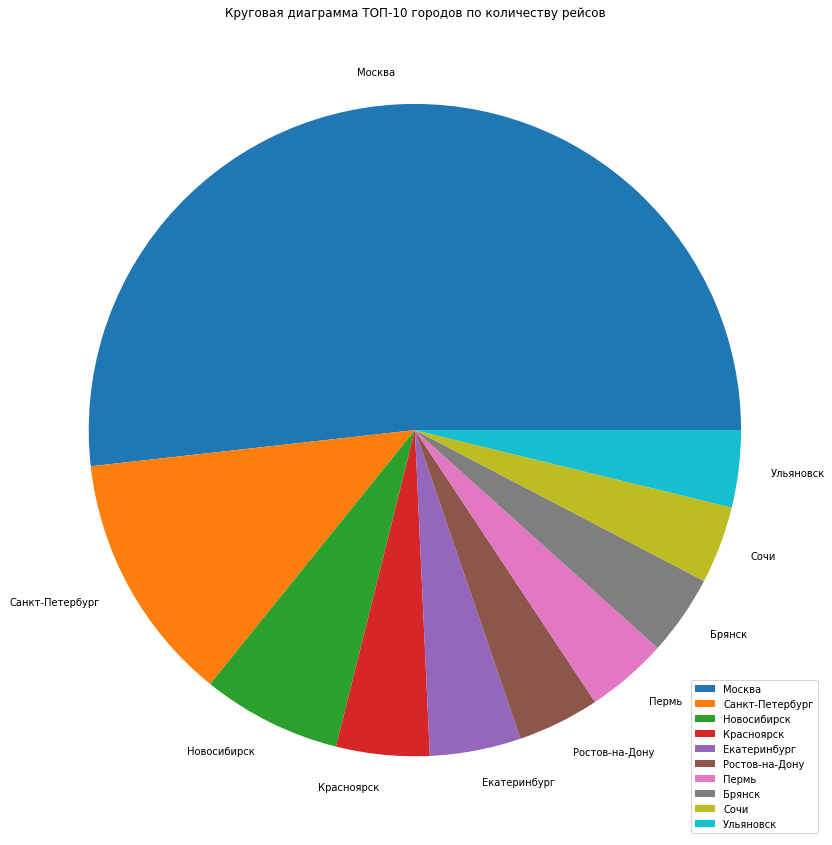

In [14]:
#Построим круговую диаграмму.
data_pie = pd.DataFrame({'flights': data_city_10['average_flights'].values}, index=data_city_10['city'].values)

data_pie.plot(kind='pie', subplots=True, figsize=(15, 15))
plt.title("Круговая диаграмма ТОП-10 городов по количеству рейсов")
plt.ylabel("")
plt.show()

Text(0.5, 0, 'Города')

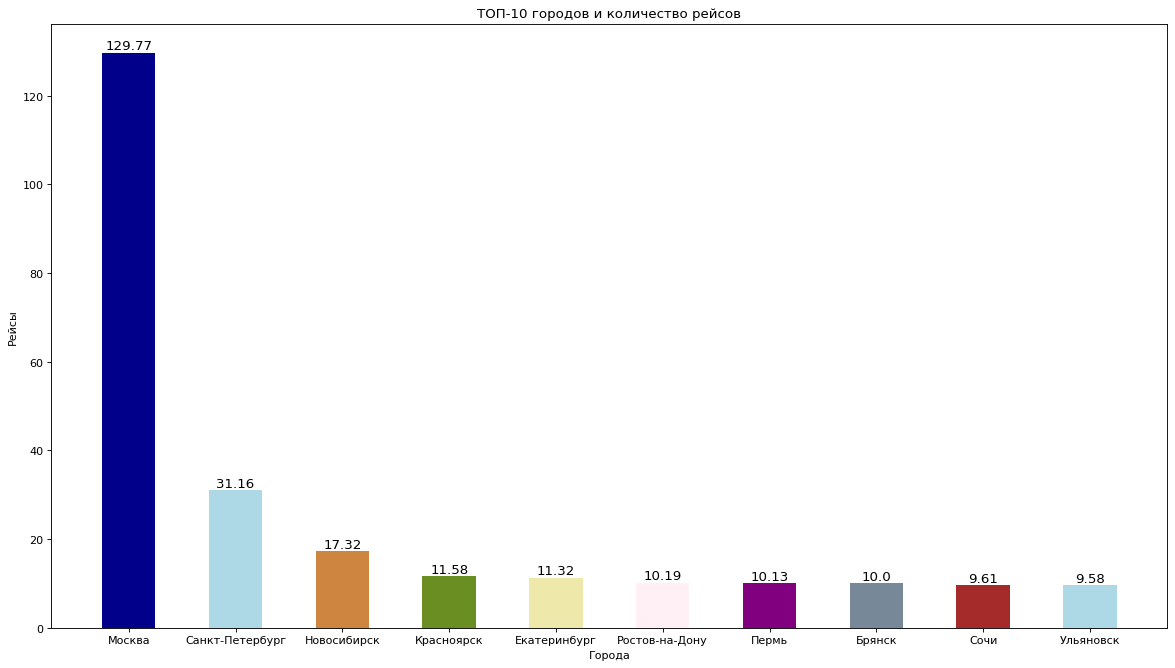

In [15]:
#Построим столбчатую диаграмму.
data_city_10 = data_city_10.sort_values(by = 'average_flights', ascending = False)
n = data_city_10['city'].__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

plt.figure(figsize=(18,10), dpi= 80)
plt.bar(data_city_10['city'].values.tolist(), data_city_10['average_flights'].values, color=c, width=.5)
for i, val in enumerate(data_city_10['average_flights'].values):
    plt.text(i, val, round(val, 2), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})
    
plt.title('ТОП-10 городов и количество рейсов', fontsize=12)
plt.ylabel('Рейсы')
plt.xlabel('Города') 

**Вывод**

По графикам видно, что:
- Москва в 4 раза превышает следующий город Санкт-Петеребург по количеству рейсов.
- Санкт-Петербург имеет в 1.8 раза больше рейсов, чем Новосибирск.
- Новосибирск в 1,5 раза превышает Красноярск по количеству рейсов.
- Остальные города в топе отличаются друг от друга немного: в пределах 2 полетов.
- Наименьшее количество рейсов из Ульяновска.

В ТОП-3 самые крупные города страны. Далее города идут по популярности фестивальной жизни: есть крупные региональные центры, туристические города.

## Вывод

По полученным данным проведен анализ спроса пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

**В ТОП-10 по количеству рейсов входят города:**
- Москва
- Санкт-Петербург
- Новосибирск
- Красноярск
- Екатеринбург
- Ростов-на-Дону
- Пермь
- Брянск
- Сочи
- Ульяновск

По графикам видим, что:
- Москва в 4 раза превышает следующий город Санкт-Петеребург по количеству рейсов.
- Санкт-Петербург имеет в 1.8 раза больше рейсов, чем Новосибирск.
- Новосибирск в 1,5 раза превышает Красноярск по количеству рейсов.
- Остальные города в топе отличаются друг от друга немного: в пределах 2 полетов.
- Наименьшее количество рейсов из Ульяновска.

**Рейтинг по количеству рейсов:**
- Cessna 208 Caravan
- Bombardier CRJ-200
- Sukhoi SuperJet-100
- Airbus A321-200
- Boeing 737-300
- Airbus A319-100
- Boeing 767-300
- Boeing 777-300

Разница межжду №1 и №8: 15,2 раза.

По моделям самолетов видно: чем вместительнее самолет, тем реже он летает.

**Итог** 
- Наибольшая популярность у фестивалей в самых крупных городах страны: Москва, Санкт-Петербург, Новосибирск.
- Наибольшей популярностью среди самолетов обладают небольшие воздушные судна: Cessna 208 Caravan, Bombardier CRJ-200, 
Sukhoi SuperJet-100.